In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [27]:
data2 = pd.read_feather("/Users/weilu/Research/server/may_2018/02_week/all_data_folder/second_rerun3_with_goEnergyrerun_7_14_May_124103.feather")

In [28]:
data2['BiasTo'].unique()

array(['86.0', '84.0', '76.0', '72.0', '54.0', '70.0', '50.0', '56.0',
       '80.0', '88.0', '44.0', '46.0', '96.0', '62.0', '110.0', '48.0',
       '108.0', '106.0', '60.0', '40.0', '78.0', '74.0', '66.0', '52.0',
       '94.0', '104.0', '82.0', '98.0', '68.0', '92.0', '64.0', '42.0',
       '58.0', '90.0', '100.0', '102.0'], dtype=object)

In [24]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/02_week/all_data_folder/second_longrerun_5_14_May_155146.feather")

In [30]:
d = data.query("BiasTo != '100.0'")

In [36]:
d.reset_index().to_feather("/Users/weilu/Research/server/may_2018/02_week/all_data_folder/second_longrerun_5.feather")

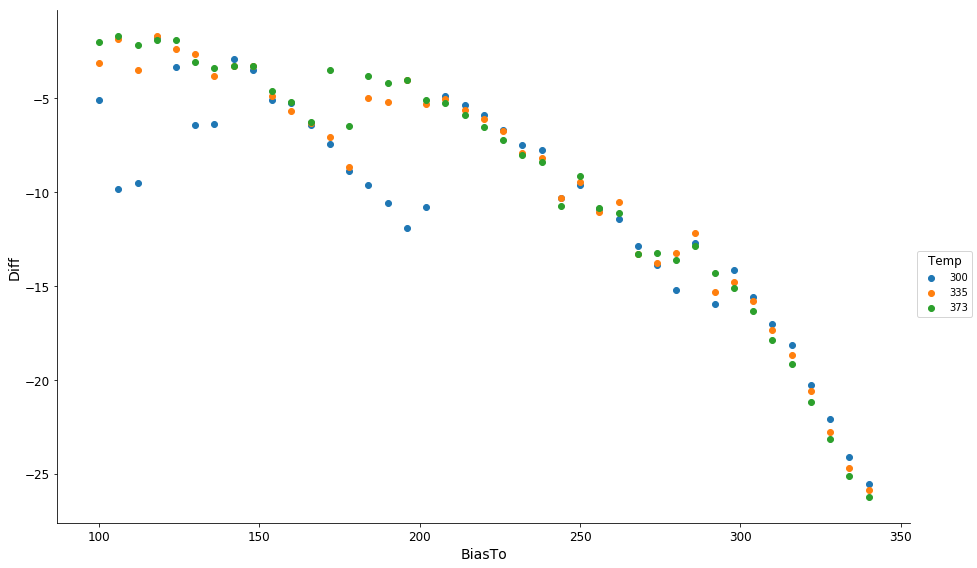

In [2]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second_long/rerun_1_10_May_231258.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

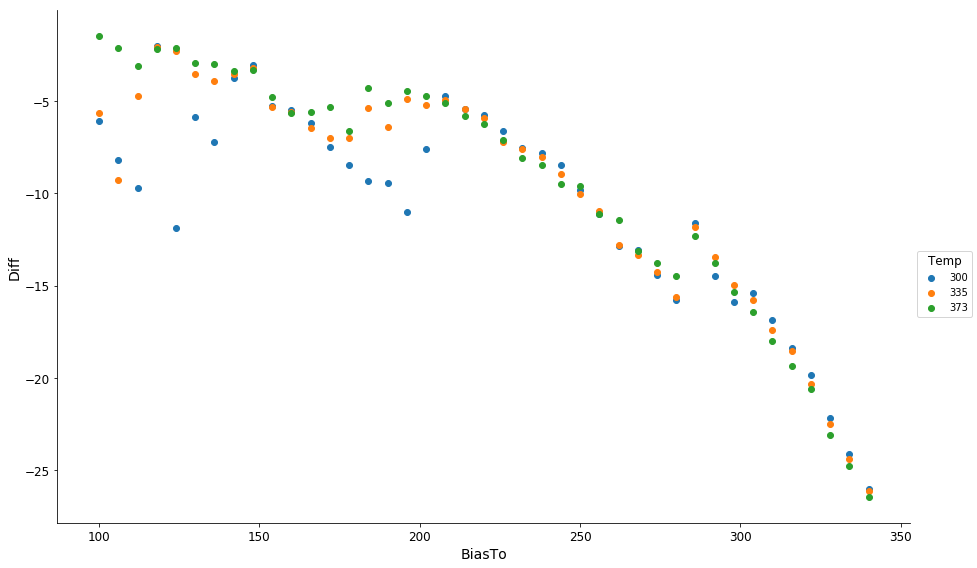

In [5]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second_long/rerun_3_11_May_131422.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun3 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

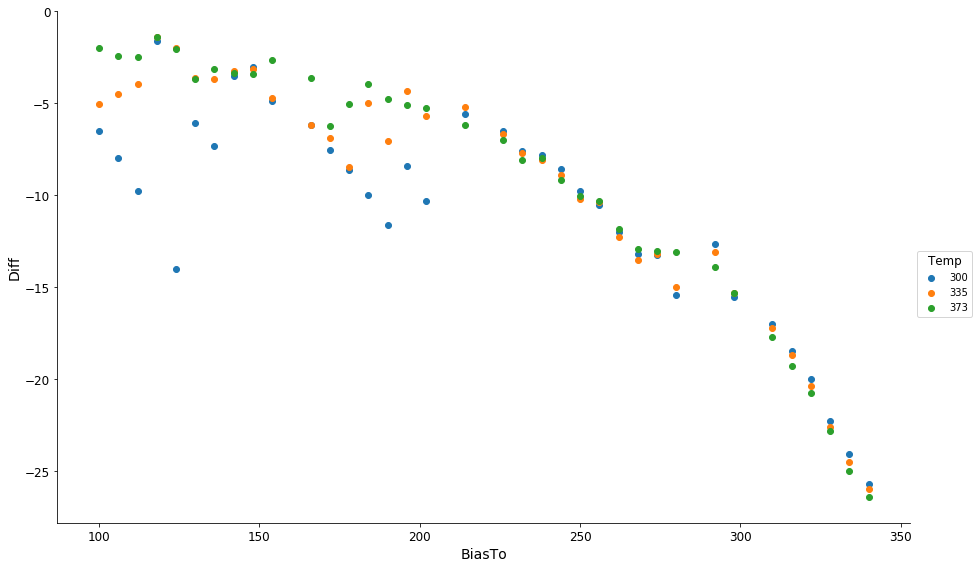

In [22]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second_long/rerun_5_14_May_155146.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun5 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

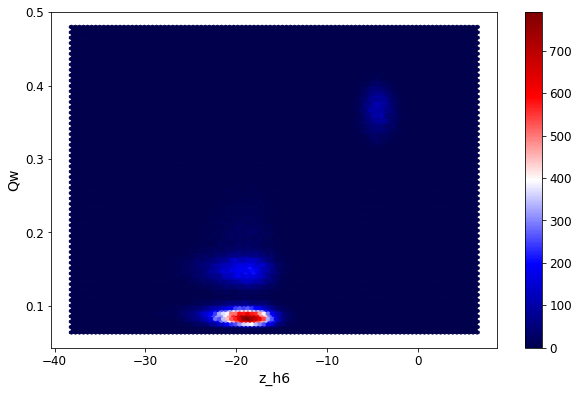

In [101]:
rerun5.query("Temp == 300").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

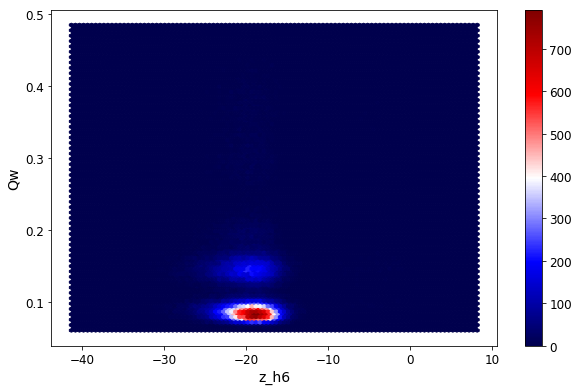

In [92]:
rerun5.query("Temp == 335").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [103]:
t = rerun5.query("Temp == 335 and z_h6 > -10")
select(t, i=1)

count        mean       std         min         25%         50%  \
BiasTo Run                                                                    
100.0  1     10.0   96.885458  4.879713   90.998707   95.142151   96.553551   
       7    220.0   93.343060  4.739800   83.254983   90.032380   93.231669   
106.0  0     39.0   98.172817  4.278855   90.962516   95.018943   97.803319   
       5      2.0   98.494350  1.195716   97.648851   98.071600   98.494350   
112.0  1      8.0  103.264801  2.812743  101.006303  101.156454  102.626063   
       5    207.0  108.336813  5.852188   91.661251  104.819697  108.383373   
118.0  2     14.0  112.101558  4.097340  103.994893  109.238260  111.926518   
       4     17.0  114.066643  5.311149  101.725127  109.956906  115.102625   
       6      4.0  119.792016  4.657009  114.791170  116.965519  119.375835   
124.0  1      6.0  110.337273  3.781957  104.500659  108.567977  110.474367   
       2     74.0  120.006869  4.890324  108.416125  116.262509  119.922622   
       6     25.0  120.225322  4.475290  110.354370  118.054433  120.916719   
130.0  0     34.0  122.121241  6.220569  108.476543  117.725798  122.354659   
       1      9.0  127.266334  4.810529  120.063987  124.590548  126.449900   
       11   136.0  126.212789  5.149580  110.983446  122.933531  126.289257   
136.0  9     35.0  131.474616  5.085674  121.514165  127.861091  129.788992   
154.0  0     29.0  149.089464  5.305607  140.068185  147.074937  148.422446   
       2     23.0  147.129888  5.608708  138.274852  143.696983  144.768924   
184.0  1      7.0  178.819985  4.099389  172.566183  177.179782  178.325803   
       3    115.0  179.460131  6.805056  164.920036  174.058625  180.040590   
196.0  4     25.0  188.130136  4.972396  175.176343  186.034510  187.572508   
       8      6.0  192.353764  4.296103  187.422970  189.229962  191.713687   
202.0  11     6.0  195.904924  2.884139  193.189368  194.075049  194.832075   
214.0  3     28.0  207.822519  5.177553  197.694876  203.375880  208.605606   
232.0  4     14.0  221.197600  4.177039  211.919142  219.652045  222.246817   
250.0  1      6.0  230.956321  5.510079  224.432472  227.258310  230.925502   
       2      5.0  233.799590  3.307059  227.994033  234.667706  234.852748   

                   75%         max  
BiasTo Run                          
100.0  1     97.389566  108.812547  
       7     96.695901  110.679255  
106.0  0    101.521930  106.386584  
       5     98.917099   99.339849  
112.0  1    104.063978  109.204981  
       5    112.536859  121.248889  
118.0  2    114.300290  120.108372  
       4    118.250686  120.901855  
       6    122.202331  125.625222  
124.0  1    112.826954  115.030580  
       2    123.584996  129.132621  
       6    123.161208  126.287589  
130.0  0    125.658375  138.370562  
       1    129.716521  136.941943  
       11   128.793704  141.797037  
136.0  9    135.720933  143.005868  
154.0  0    150.540634  166.678734  
       2    150.374684  159.077456  
184.0  1    180.254931  185.978486  
       3    183.906325  199.800374  
196.0  4    190.443235  200.832589  
       8    195.553694  198.036488  
202.0  11   197.198441  200.766089  
214.0  3    210.769646  220.821792  
232.0  4    224.166456  225.992584  
250.0  1    232.806551  239.984970  
       2    235.178047  236.305415

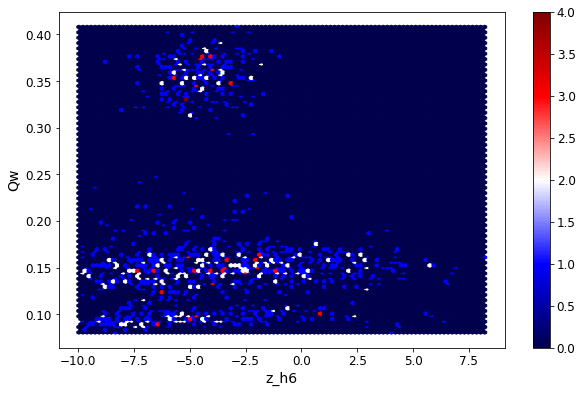

In [93]:
rerun5.query("Temp == 335 and z_h6 > -10").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

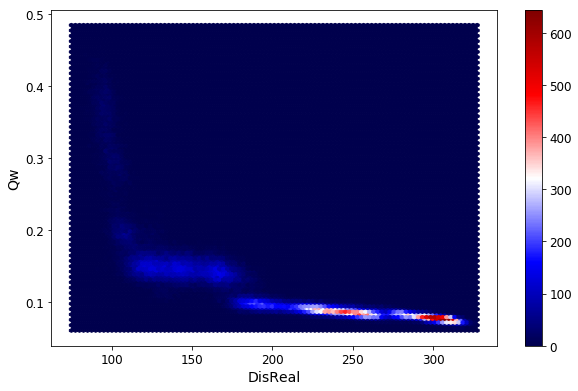

In [76]:
rerun5.query("Temp == 335").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

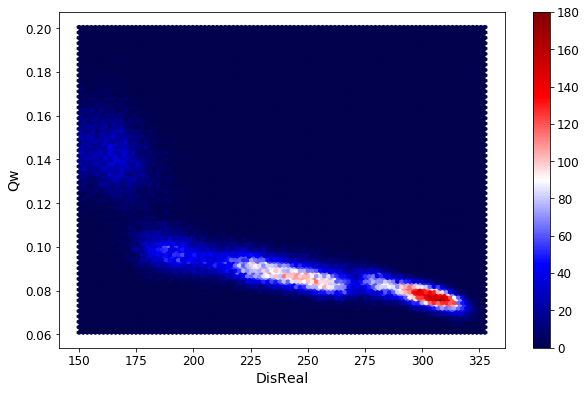

In [77]:
rerun5.query("Temp == 335 and DisReal > 150").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

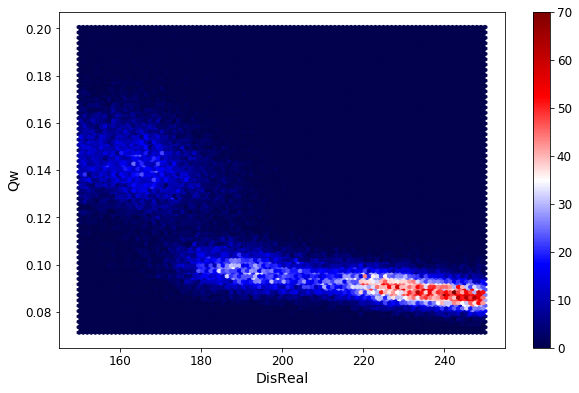

In [91]:
t= rerun5.query("Temp == 335 and DisReal > 150 and DisReal < 250")
t.plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [90]:
select(t.query("DisReal < 250"))

count        mean       std         min         25%         50%  \
BiasTo Run                                                                     
184.0  1     675.0  180.960705  5.295053  161.914437  177.362968  180.643438   
       3     539.0  180.970596  5.658185  164.920036  177.359894  180.818769   
       4     287.0  179.688440  5.912062  164.720196  175.905537  180.042013   
       7     190.0  181.842066  5.532978  168.358536  178.409541  181.582586   
190.0  1     118.0  186.525320  6.288673  170.380468  182.631295  186.319299   
       2     528.0  186.288835  5.607378  171.124087  182.570764  186.196409   
       6     418.0  186.256786  5.808236  167.417293  181.991754  185.850619   
       11    258.0  184.418764  6.041094  166.729937  180.303509  184.480471   
196.0  2     610.0  191.721433  5.834754  175.041425  188.056413  191.722739   
       4     228.0  191.879992  5.534577  177.101989  187.887420  191.927669   
       8    1155.0  192.380808  5.736677  172.266251  188.348601  192.280908   
       11    121.0  190.761961  5.716098  175.439685  187.135451  190.454082   
202.0  1     400.0  197.251562  5.214967  183.122168  193.587111  197.847510   
       2     573.0  197.695676  5.575842  180.292669  193.628970  198.227423   
       3     157.0  198.596750  5.441615  184.599706  195.027190  198.315475   
       4     768.0  197.682626  5.735479  179.284464  193.866631  197.743849   
       11    205.0  197.185679  5.824024  183.478840  193.274175  196.222408   
214.0  0     659.0  209.044501  5.346511  193.830640  205.232420  208.874183   
       2     354.0  209.736240  5.530664  195.366612  205.826505  209.765066   
       3     483.0  208.546272  5.585731  193.258738  204.953365  208.674715   
       8     941.0  208.503938  5.221715  188.908787  204.859395  208.579863   
226.0  0     343.0  219.219714  5.204065  205.079873  215.559370  219.205766   
       2     157.0  220.070092  4.828975  206.288960  217.235947  220.078681   
       4    1231.0  219.364492  5.268179  202.561018  215.880422  219.658065   
       5     757.0  219.220054  5.637756  198.230519  215.559405  219.236560   
232.0  0     728.0  224.660677  5.384755  207.090939  221.069764  224.705371   
       2     792.0  223.797143  5.245027  206.125146  220.147328  223.997976   
       4     641.0  223.973648  5.373713  206.655385  220.122555  223.813652   
       7     253.0  225.507833  5.358746  210.510305  222.290966  226.130379   
238.0  0     191.0  229.482555  4.855743  213.926864  226.627215  229.533964   
       2     854.0  230.022308  5.380038  213.636839  226.511108  229.828835   
       3     666.0  229.602933  5.143255  214.970952  226.302962  229.572837   
       6     521.0  230.402025  5.357642  214.515816  226.879012  230.561530   
       7     267.0  229.485736  5.310540  214.484883  225.849729  229.758134   
244.0  1    1160.0  235.130651  5.190774  216.510600  231.603109  235.068672   
       3     248.0  235.841607  5.226451  222.715110  232.737213  235.838458   
       4     684.0  235.110598  5.318933  218.682235  231.339113  234.891450   
       9     324.0  234.772890  5.225279  219.634917  231.073748  234.662193   
250.0  1     229.0  239.565552  5.170284  223.906855  236.186818  239.852249   
       2    1316.0  239.233245  4.991075  224.243485  235.986198  239.380979   
       7     467.0  240.184284  4.859973  222.214564  237.099155  240.565662   
       11    410.0  239.165054  4.989338  225.075316  236.041312  239.169380   
256.0  2     248.0  244.892373  3.796852  232.985758  242.696005  245.658241   
       3     334.0  243.564257  4.107768  228.989039  240.937088  244.296400   
       4     834.0  243.046906  4.268064  229.309456  240.109176  243.556446   
       7     358.0  243.220850  4.217079  230.750833  240.396798  243.754897   
       9     166.0  243.829927  3.945197  230.875795  241.210342  244.250099   
262.0  2     377.0  245.379285  3.433644  231.489749  243.293902  246.010870   
       4     

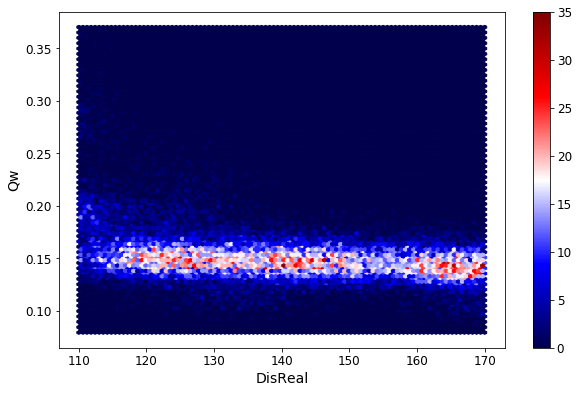

In [83]:
t = rerun5.query("Temp == 335 and DisReal > 110 and DisReal < 170")
t.plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [86]:
t.shape

(24316, 45)

In [85]:
t.query("Lipid1 > -0.1").shape

(790, 45)

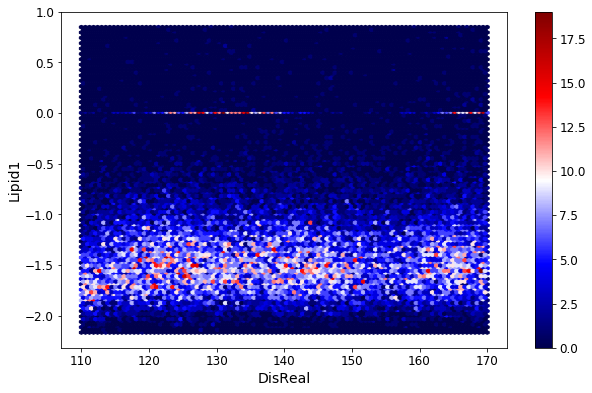

In [84]:
t.plot.hexbin("DisReal", "Lipid1", cmap="seismic", sharex=False)

In [72]:
t.shape

(24316, 45)

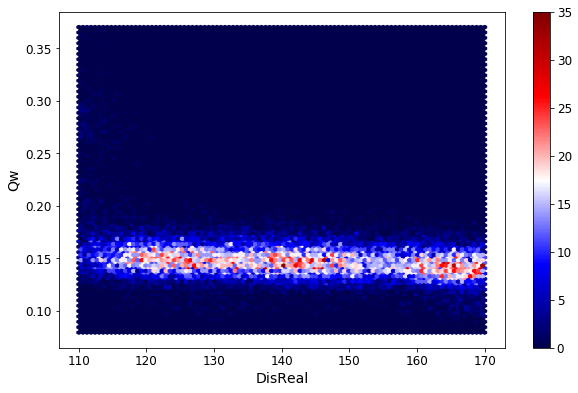

In [75]:
t.query("z_h5 < 0 and z_h4 < 0").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

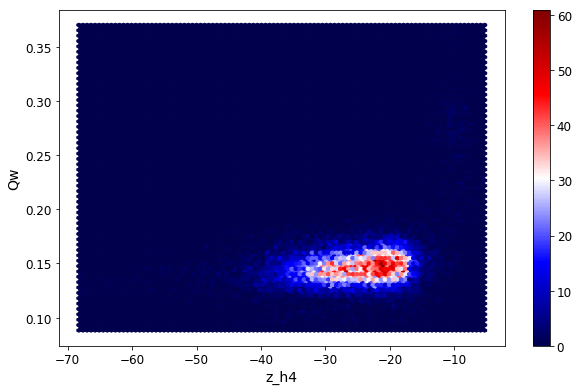

In [66]:
t.query("z_h5 < 0 and z_h4 < 0").plot.hexbin("z_h4", "Qw", cmap="seismic", sharex=False)

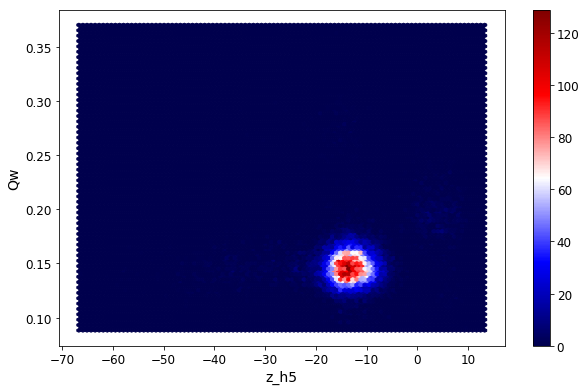

In [59]:
t.plot.hexbin("z_h5", "Qw", cmap="seismic", sharex=False)

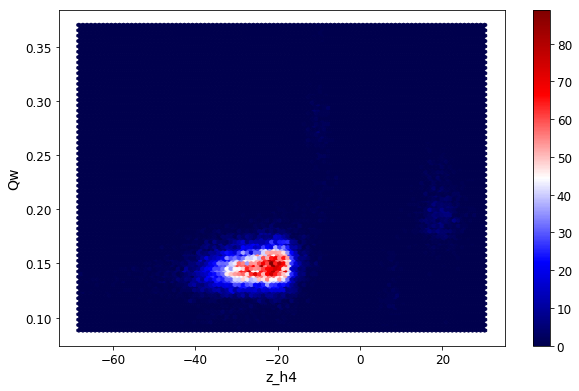

In [64]:
t.plot.hexbin("z_h4", "Qw", cmap="seismic", sharex=False)

In [61]:
select(t.query("z_h5 > 0"))

,,count,mean,std,min,25%,50%,75%,max
BiasTo,Run,,,,,,,,
112.0,9,188.0,114.017234,2.849838,110.020622,111.801604,113.784511,115.433779,124.098805
130.0,4,215.0,123.572990,5.260558,110.576225,120.688421,123.800533,126.579746,136.654077
136.0,0,128.0,128.763377,5.238112,115.450773,125.563118,129.144027,132.475220,140.650885


In [56]:
t = rerun5.query("Dis_h56 > 60").query("Temp == 335 and DisReal > 110 and DisReal < 170")
select(t)

count        mean       std         min         25%         50%  \
BiasTo Run                                                                     
112.0  9     220.0  113.888760  2.744472  110.014821  111.754585  113.501486   
118.0  2     149.0  118.929087  5.036779  110.318405  115.040301  118.396388   
       4     363.0  118.837418  4.595188  110.263413  115.515223  118.175681   
       6     346.0  118.515115  5.009344  110.021542  114.646891  118.141035   
124.0  0     226.0  123.344632  5.102410  110.339425  120.071888  123.407139   
       2     139.0  123.610012  5.411238  110.747112  119.804334  123.453122   
       4     312.0  122.157125  5.330646  110.015163  118.217874  122.563526   
       6     493.0  123.376960  5.409960  110.687132  119.350656  123.142081   
130.0  0     271.0  127.861909  5.760101  112.110964  124.012180  127.941855   
       4     249.0  123.594783  5.250152  110.576225  120.634680  123.859937   
       11    604.0  128.502929  5.432917  113.326503  124.692949  128.401144   
136.0  0     152.0  128.708072  5.205293  115.450773  125.508009  128.777915   
       5     205.0  133.500936  5.624420  116.377924  128.951640  133.363093   
       9    1137.0  132.985569  5.638666  115.683772  129.470145  133.155802   
142.0  1     462.0  139.556646  5.205257  125.534582  135.921523  139.255201   
       2     428.0  138.953470  5.163070  120.032734  135.344485  138.830267   
       7     375.0  139.234213  5.927344  122.182281  135.071625  139.476345   
       8     485.0  139.172887  5.471542  120.405640  135.405845  139.135048   
148.0  0     659.0  145.668043  5.803274  123.781484  141.933870  145.472212   
       1     757.0  145.443881  5.277007  128.972932  141.897429  145.261542   
       10    461.0  145.016819  5.673998  126.553971  141.128202  145.093329   
154.0  0     761.0  149.982482  5.319381  133.613723  146.729452  150.076153   
       2     687.0  149.529956  5.648374  132.976905  145.529713  149.568446   
       11    474.0  149.362720  5.050657  135.092463  146.027241  149.519170   
166.0  1     827.0  159.480823  5.061427  142.105013  156.004545  159.711161   
       3    1062.0  159.666864  4.777238  137.484527  156.496710  159.785538   
       11    348.0  160.320921  4.696041  147.676723  156.760252  160.547298   
172.0  3     584.0  163.486282  4.147845  150.070914  160.786850  163.958580   
       5     758.0  163.685943  4.076048  149.538969  161.029999  164.076675   
       11    552.0  163.330487  4.299640  144.273653  160.896827  163.960506   
178.0  0     255.0  165.885824  3.076300  154.709420  164.248085  166.398331   
       2     558.0  165.542292  3.512422  150.534593  163.757211  166.310432   
       3     372.0  165.911467  3.034237  154.732767  164.308512  166.531365   

                   75%         max  
BiasTo Run                          
112.0  9    115.352508  124.098805  
118.0  2    122.659559  131.129405  
       4    121.947164  139.727324  
       6    121.770936  135.535130  
124.0  0    126.692817  137.023511  
       2    127.345963  137.716777  
       4    125.676376  135.780513  
       6    126.964742  141.042592  
130.0  0    131.788176  143.155298  
       4    127.146182  136.654077  
       11   132.246495  143.503038  
136.0  0    132.366597  140.650885  
       5    138.346592  146.459772  
       9    136.658481  150.921657  
142.0  1    142.932159  159.528101  
       2    142.479498  151.848282  
       7    142.616267  159.256350  
       8    143.051569  155.490731  
148.0  0    149.762275  162.147887  
       1    149.245869  159.875379  
       10   148.949375  161.346503  
154.0  0    153.608444  164.213781  
       2    153.391045  166.480971  
       11   152.995679  161.782408  
166.0  1    163.320812  169.867479  
       3    163.024142  169.968945  
       11   163.703565  169.830421  
172.0  3    166.891519  169.997033  
       5    166.729176  169.993074  
       11   166.538387  169.855068  
178.0  0    168.372149  169.

In [48]:
t = rerun5.query("Temp == 335 and DisReal > 110 and DisReal < 170")
select(t)

count        mean       std         min         25%         50%  \
BiasTo Run                                                                     
112.0  5     181.0  113.684407  3.033113  110.022421  111.331302  113.040684   
       9     659.0  113.517973  2.781547  110.007645  111.355377  112.816463   
118.0  2     436.0  118.223400  4.962972  110.042309  114.080159  117.783822   
       4     827.0  117.802909  4.491732  110.051239  114.442723  117.357430   
       6     752.0  118.027689  4.668094  110.021542  114.408115  117.697576   
       7     113.0  117.527195  4.648448  110.369641  113.865483  116.817902   
124.0  0     482.0  122.272487  5.478604  110.186362  118.127865  122.207443   
       2     376.0  121.893262  5.087470  110.292408  118.622033  121.686982   
       4     470.0  122.107126  5.202729  110.015163  118.234955  122.452658   
       6    1132.0  122.406078  5.331351  110.182086  118.639788  122.283010   
130.0  0     561.0  127.051908  5.684412  110.133203  123.224012  127.084729   
       1     120.0  127.125932  5.235139  116.521278  123.096766  126.651130   
       4     457.0  122.841322  5.175745  110.576225  119.499330  123.036017   
       11   1356.0  127.351156  5.588740  110.263989  123.622168  127.254723   
136.0  0     218.0  128.303203  4.931341  115.450773  125.167614  128.096510   
       3     319.0  132.660625  5.684556  116.110332  128.640883  132.700478   
       5     347.0  133.026238  5.689429  116.377924  128.845935  133.327957   
       9    1616.0  132.686233  5.585466  115.683772  129.104881  132.815021   
142.0  1     676.0  138.860722  5.223732  124.410287  135.608335  138.901767   
       2     608.0  138.807977  5.281854  120.032734  135.076668  138.621238   
       7     514.0  139.005279  5.916764  121.972151  134.641696  139.217018   
       8     702.0  138.414627  5.620920  120.405640  134.879579  138.448769   
148.0  0     840.0  145.222400  5.814266  123.781484  141.429703  145.146624   
       1    1073.0  144.651276  5.439659  128.259737  140.982207  144.621892   
       10    587.0  144.647215  5.733792  126.553971  140.731848  144.715358   
154.0  0    1012.0  149.531614  5.331009  132.691092  146.187903  149.375638   
       2     878.0  149.103452  5.664568  132.057883  145.234924  149.113538   
       11    525.0  149.164370  5.083712  135.092463  145.741993  149.249519   
166.0  1     901.0  159.303251  5.071271  142.105013  155.872764  159.522717   
       3    1154.0  159.465314  4.824944  137.484527  156.309086  159.586980   
       11    368.0  160.285651  4.728580  147.191456  156.760252  160.547298   
172.0  3     660.0  163.436187  4.211852  147.633163  160.703114  163.942093   
       5     794.0  163.565898  4.123275  149.538969  160.918856  163.930093   
       11    581.0  163.290092  4.281256  144.273653  160.856651  163.823638   
178.0  0     280.0  165.761754  3.169329  154.709420  164.058678  166.312110   
       2     584.0  165.464453  3.558843  150.534593  163.626564  166.236520   
       3     380.0  165.920288  3.026844  154.732767  164.340449  166.531365   
       6     106.0  166.100398  2.855009  155.241335  164.803261  166.437584   

                   75%         max  
BiasTo Run                          
112.0  5    115.354613  126.114807  
       9    115.087683  124.098805  
118.0  2    121.931738  133.558308  
       4    120.766455  139.727324  
       6    121.257865  135.535130  
       7    120.914601  131.704392  
124.0  0    126.328702  137.023511  
       2    125.401616  137.716777  
       4    125.624072  135.780513  
       6    126.059010  141.042592  
130.0  0    131.077958  143.155298  
       1    131.226041  139.055150  
       4    126.096873  136.654077  
       11   131.149103  143.503038  
136.0  0    131.571564  140.650885  
       3    136.744893  147.759901  
       5    137.385988  146.459772  
       9    136.362374  150.921657  
142.0  1    142.145539  159.528101  
       2    142.420378  152.814645 

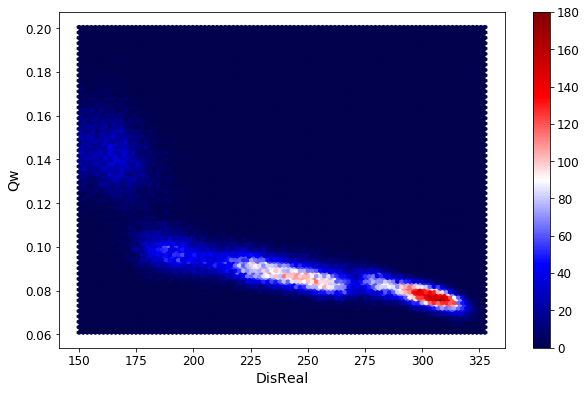

In [44]:
rerun5.query("Temp == 335 and DisReal > 150").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

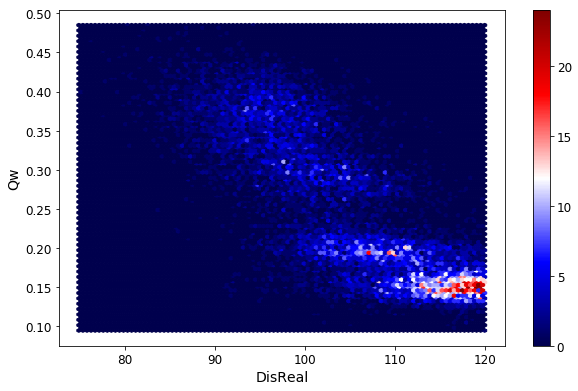

In [23]:
rerun5.query("Temp == 335 and DisReal < 120").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

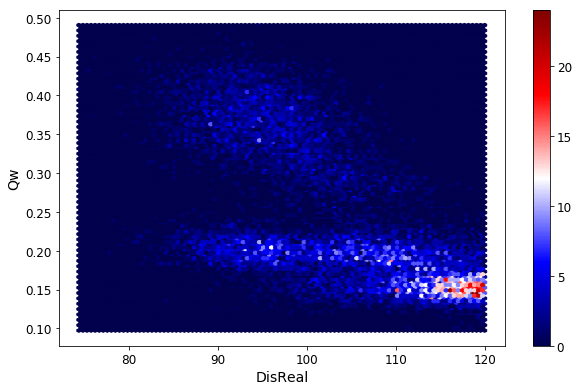

In [16]:
rerun3.query("Temp == 335 and DisReal < 120").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

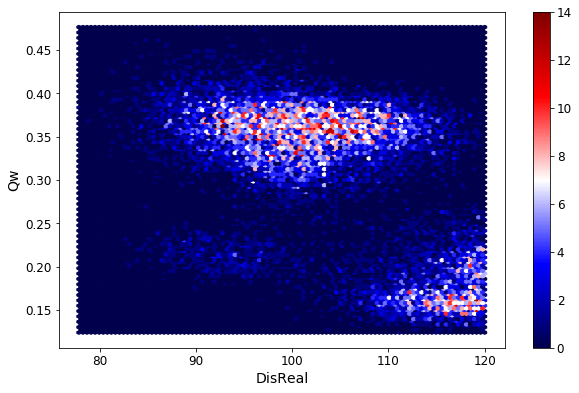

In [17]:
rerun3.query("Temp == 300 and DisReal < 120").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

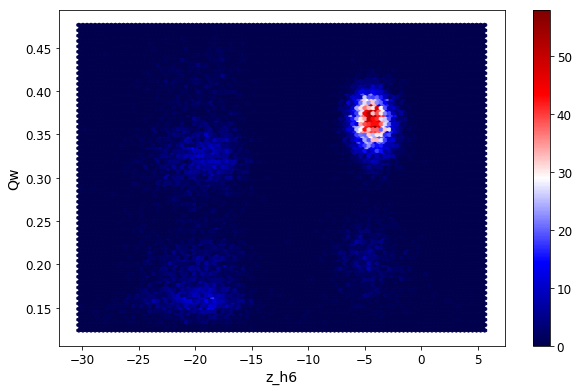

In [18]:
rerun3.query("Temp == 300 and DisReal < 120").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

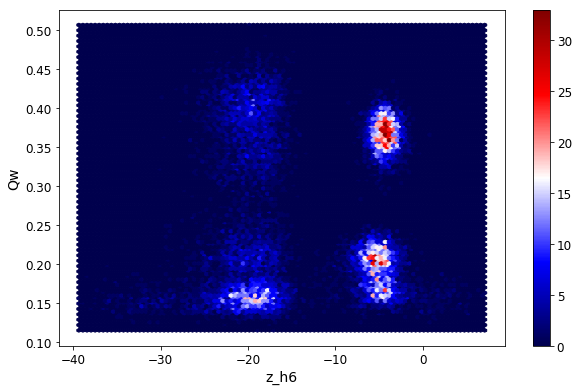

In [20]:
rerun1.query("Temp == 300 and DisReal < 120").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [14]:
t = rerun3.query("Temp == 300 and DisReal < 200 and Qw > 0.25")
select(t)

count        mean       std         min         25%         50%  \
BiasTo Run                                                                     
100.0  3     420.0   94.442142  4.909369   80.446466   90.985544   94.615634   
       7    2080.0   93.839833  4.756603   77.847773   90.632894   93.831517   
106.0  4    1998.0   98.780802  4.763250   81.111498   95.821646   98.940109   
112.0  1    2486.0  102.271368  4.459356   87.661806   99.367031  102.352885   
124.0  1    1884.0  109.865204  4.233533   95.721171  106.990587  109.851261   
136.0  0     332.0  127.654587  4.886030  116.035375  124.201343  127.690403   

                   75%         max  
BiasTo Run                          
100.0  3     97.623806  108.358270  
       7     97.041950  110.338102  
106.0  4    101.841943  115.396955  
112.0  1    105.315139  116.577365  
124.0  1    112.538459  123.862923  
136.0  0    130.825819  139.957537

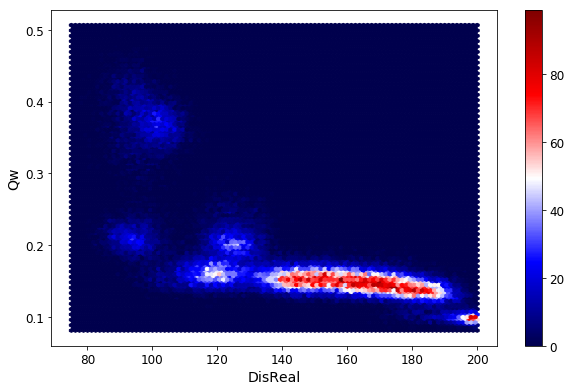

In [10]:
rerun1.query("Temp == 300 and DisReal < 200").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

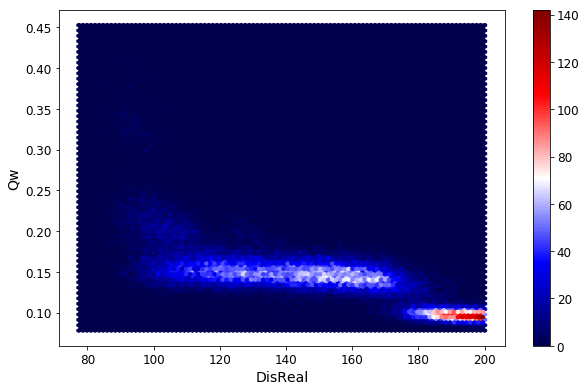

In [11]:
rerun1.query("Temp == 335 and DisReal < 200").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

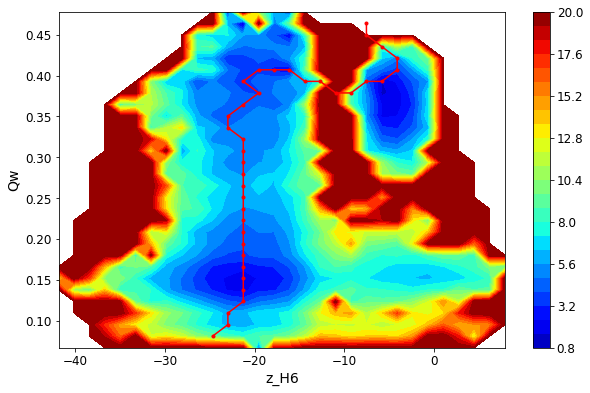

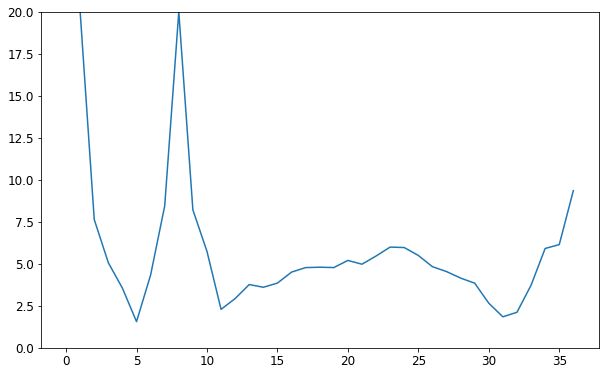

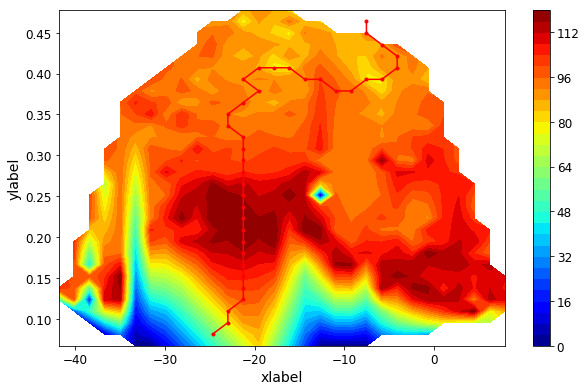

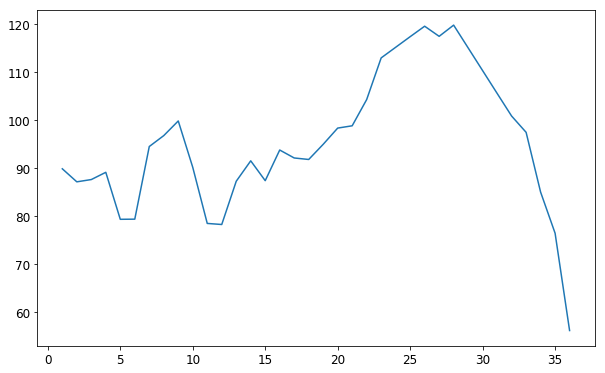

In [42]:
pre = "/Users/weilu/Research/server/may_2018/02_week"
temp = 310
location = pre + "/second_long/_280-350/2d_z_qw/force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 10), end=(28,20),save=False, xlabel="z_H6", ylabel="Qw", zmax=20,res=30)
f_original =f
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

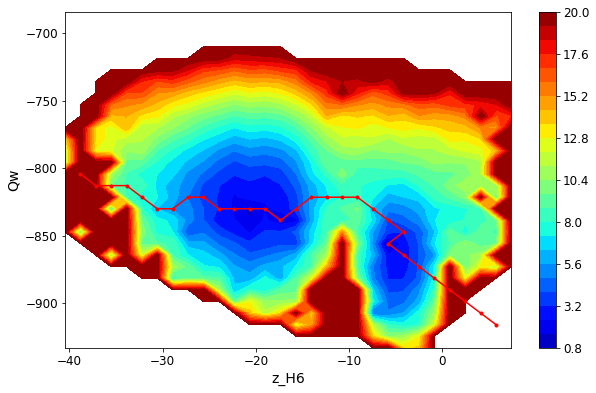

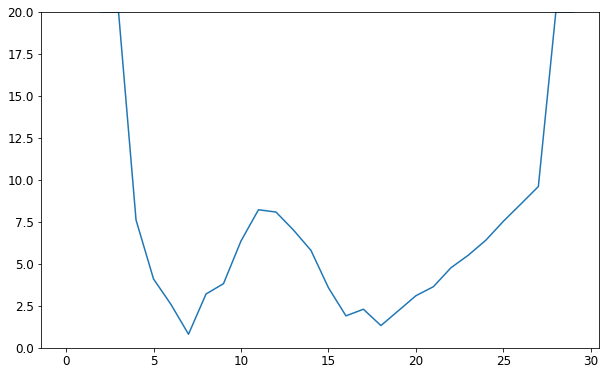

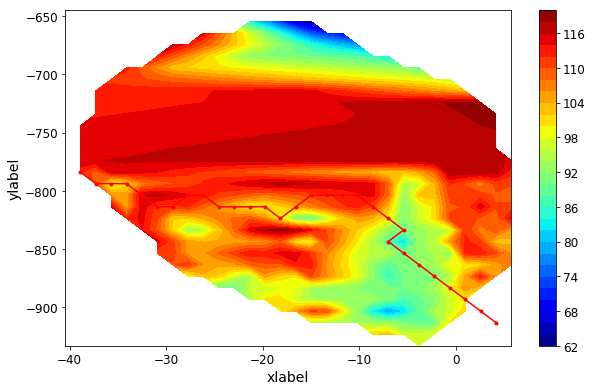

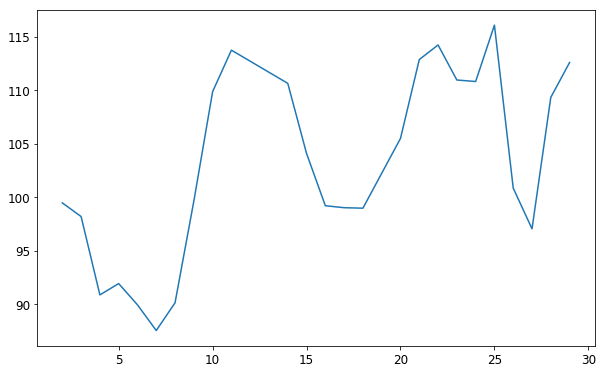

In [41]:
pre = "/Users/weilu/Research/server/may_2018/02_week"
temp = 310
location = pre + "/second_long/_280-350/2d_z_qw/energy_z_h6/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(15, 1), end=(2,28),save=False, xlabel="z_H6", ylabel="Qw", zmax=20,res=30)
f_original =f
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)